In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats.stats import pearsonr
import warnings
%matplotlib inline


In [5]:
# Read-in data as Excel file
vix_data_file = "C:/Users/blake/Desktop/clean_stock_data.xlsx"

In [4]:
#Convert Excel file to Dataframe
stock_data_df = pd.read_excel(vix_data_file,
sheet_name=0,
header=1,
index_col=False,
keep_default_na=False
)

In [6]:
#Print Dataframe to confirm import
stock_data_df.head(10)

,PX_LAST_ESA,PX_LAST_1,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8,Date
0,1115.10,22.95,25.80,26.00,26.30,26.35,26.30,26.40,26.35,2009-12-31
1,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95,2010-01-01
2,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95,2010-01-04
3,1136.52,21.55,24.45,24.85,25.45,25.50,25.50,25.55,25.70,2010-01-05
4,1137.14,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30,2010-01-06
5,1141.69,20.45,23.15,23.85,24.75,24.85,24.85,24.90,25.10,2010-01-07
6,1144.98,19.90,22.55,23.40,24.40,24.65,24.60,24.75,24.90,2010-01-08
7,1146.98,19.50,22.25,23.25,24.15,24.30,24.40,24.50,24.65,2010-01-11
8,1136.22,20.25,22.80,23.65,24.25,24.45,24.45,24.60,24.75,2010-01-12
9,1145.68,19.40,22.50,23.45,24.15,24.40,24.40,24.55,24.55,2010-01-13


In [7]:
#Create new Dataframe, set 'Date' as index, drop column named 'Date' 
time_indexed_stock_df = stock_data_df.set_index(stock_data_df['Date'])
time_indexed_stock_df = time_indexed_stock_df.drop(['Date'], axis=1)
time_indexed_stock_df.head(10)

,PX_LAST_ESA,PX_LAST_1,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8
Date,,,,,,,,,
2009-12-31,1115.10,22.95,25.80,26.00,26.30,26.35,26.30,26.40,26.35
2010-01-01,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95
2010-01-04,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95
2010-01-05,1136.52,21.55,24.45,24.85,25.45,25.50,25.50,25.55,25.70
2010-01-06,1137.14,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30
2010-01-07,1141.69,20.45,23.15,23.85,24.75,24.85,24.85,24.90,25.10
2010-01-08,1144.98,19.90,22.55,23.40,24.40,24.65,24.60,24.75,24.90
2010-01-11,1146.98,19.50,22.25,23.25,24.15,24.30,24.40,24.50,24.65
2010-01-12,1136.22,20.25,22.80,23.65,24.25,24.45,24.45,24.60,24.75


In [8]:
#copy Dataframe to new name "spx_vix_df" and rename columns 
spx_vix_df = time_indexed_stock_df.rename(columns={
    'PX_LAST_ESA': 'SPX',
    'PX_LAST_1': 'VIX_1',
    'PX_LAST_2': 'VIX_2',
    'PX_LAST_3': 'VIX_3',
    'PX_LAST_4': 'VIX_4',
    'PX_LAST_5': 'VIX_5',
    'PX_LAST_6': 'VIX_6',
    'PX_LAST_7': 'VIX_7',
    'PX_LAST_8': 'VIX_8'
})

spx_vix_df.head(10)

,SPX,VIX_1,VIX_2,VIX_3,VIX_4,VIX_5,VIX_6,VIX_7,VIX_8
Date,,,,,,,,,
2009-12-31,1115.10,22.95,25.80,26.00,26.30,26.35,26.30,26.40,26.35
2010-01-01,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95
2010-01-04,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95
2010-01-05,1136.52,21.55,24.45,24.85,25.45,25.50,25.50,25.55,25.70
2010-01-06,1137.14,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30
2010-01-07,1141.69,20.45,23.15,23.85,24.75,24.85,24.85,24.90,25.10
2010-01-08,1144.98,19.90,22.55,23.40,24.40,24.65,24.60,24.75,24.90
2010-01-11,1146.98,19.50,22.25,23.25,24.15,24.30,24.40,24.50,24.65
2010-01-12,1136.22,20.25,22.80,23.65,24.25,24.45,24.45,24.60,24.75


In [ ]:
# # (If necessary) Convert Dataframe to CSV and put in same directory
#spx_vix_df.to_csv('vix_futures.csv')

In [ ]:
# spx_df = spx_vix_df.filter(['SPX'], axis=1)
# spx_df.to_csv('spx_futures.csv')

In [ ]:
# vix_1_df = spx_vix_df.filter(['VIX_1'], axis=1)
# vix_1_df.to_csv('vix_1_futures.csv')

In [ ]:
# vix_2_df = spx_vix_df.filter(['VIX_2'], axis=1)
# vix_2_df.to_csv('vix_2_futures.csv')

In [ ]:
# vix_3_df = spx_vix_df.filter(['VIX_3'], axis=1)
# vix_3_df.to_csv('vix_3_futures.csv')

In [ ]:
# vix_4_df = spx_vix_df.filter(['VIX_4'], axis=1)
# vix_4_df.to_csv('vix_4_futures.csv')

In [ ]:
# vix_5_df = spx_vix_df.filter(['VIX_5'], axis=1)
# vix_5_df.to_csv('vix_5_futures.csv')

In [ ]:
# vix_6_df = spx_vix_df.filter(['VIX_6'], axis=1)
# vix_6_df.to_csv('vix_6_futures.csv')

In [ ]:
# vix_7_df = spx_vix_df.filter(['VIX_7'], axis=1)
# vix_7_df.to_csv('vix_7_futures.csv')

In [ ]:
# vix_8_df = spx_vix_df.filter(['VIX_8'], axis=1)
# vix_8_df.to_csv('vix_8_futures.csv')

In [9]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = spx_vix_df["SPX"].values.reshape(-1, 1)
y = spx_vix_df["VIX_1"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (2528, 1) (2528, 1)


Text(0, 0.5, 'VIX 1 ($)')

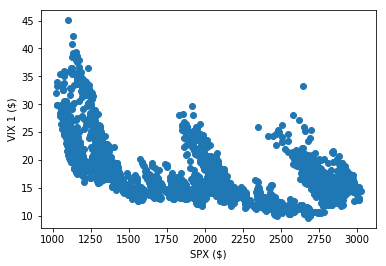

In [10]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("SPX ($)")
plt.ylabel("VIX 1 ($)")


In [11]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [12]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()



In [13]:
# Fit the model to the training data. 

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 20.719821836094237
R-squared (R2 ): 0.3113887382022522


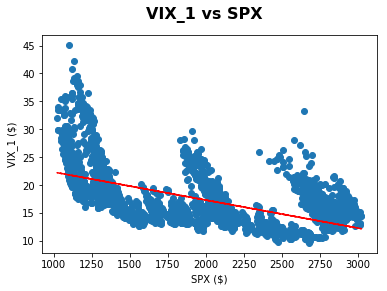

In [15]:
# Set regression line - VIX_1 vs SPX (no ML)
(slope, intercept, rvalue, _, _) = linregress(spx_vix_df["SPX"], spx_vix_df["VIX_1"])
exp_value = slope * spx_vix_df["SPX"] + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("VIX_1 vs SPX", fontsize=16, fontweight="bold")

ax.set_xlabel("SPX ($)")
ax.set_ylabel("VIX_1 ($)")

ax.plot(spx_vix_df["SPX"], spx_vix_df["VIX_1"], linewidth=0, marker='o')
ax.plot(spx_vix_df["SPX"], exp_value, '--r')

plt.show()



In [16]:
#Display key statistics of basic linear regression (no ML)

rsquared = round(rvalue**2, 3)

print('Equation of best-fit line:')
print(f'VIX_1 ($) = {round(intercept,3)} + {round(slope,3)}(SPX ($))')
print('')
print(f'R-value = {round(rvalue,3)}')
print(f'R-sq = {rsquared}')
print(f'{rsquared*100}% of the variation of VIX Futures (1) Price can be explained by SPX Price')

Equation of best-fit line:
VIX_1 ($) = 27.322 + -0.005(SPX ($))

R-value = -0.546
R-sq = 0.299
29.9% of the variation of VIX Futures (1) Price can be explained by SPX Price


In [17]:
# Convert Dataframe of "Stock Prices" to Percent Change df
percent_change_stock_df = spx_vix_df.pct_change()

#Drop first row of Dataframe bc NaN
percent_change_stock_df = percent_change_stock_df.drop(percent_change_stock_df.index[0])
percent_change_stock_df.head(10)

,SPX,VIX_1,VIX_2,VIX_3,VIX_4,VIX_5,VIX_6,VIX_7,VIX_8
Date,,,,,,,,,
2010-01-01,0.016034,-0.037037,-0.036822,-0.028846,-0.020913,-0.022770,-0.020913,-0.020833,-0.015180
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.003125,-0.024887,-0.016097,-0.015842,-0.011650,-0.009709,-0.009709,-0.011605,-0.009634
2010-01-06,0.000546,-0.034803,-0.036810,-0.026157,-0.019646,-0.017647,-0.017647,-0.017613,-0.015564
2010-01-07,0.004001,-0.016827,-0.016985,-0.014463,-0.008016,-0.007984,-0.007984,-0.007968,-0.007905
2010-01-08,0.002882,-0.026895,-0.025918,-0.018868,-0.014141,-0.008048,-0.010060,-0.006024,-0.007968
2010-01-11,0.001747,-0.020101,-0.013304,-0.006410,-0.010246,-0.014199,-0.008130,-0.010101,-0.010040
2010-01-12,-0.009381,0.038462,0.024719,0.017204,0.004141,0.006173,0.002049,0.004082,0.004057
2010-01-13,0.008326,-0.041975,-0.013158,-0.008457,-0.004124,-0.002045,-0.002045,-0.002033,-0.008081


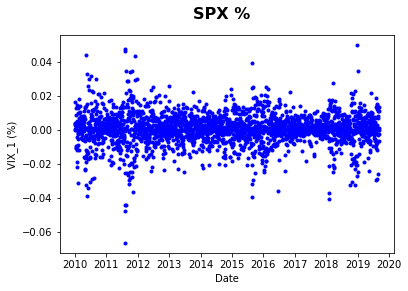

In [18]:
#More Dependencies
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Plot data 
#Note: only plotting SPX
fig, ax = plt.subplots()

fig.suptitle("SPX %", fontsize=16, fontweight="bold")

ax.set_xlabel("Date")
ax.set_ylabel("VIX_1 (%)")

ax.plot(percent_change_stock_df.index, percent_change_stock_df["SPX"], '.b')
#ax.plot(percent_change_stock_df.index, percent_change_stock_df["VIX_1"], '.r')

plt.show()

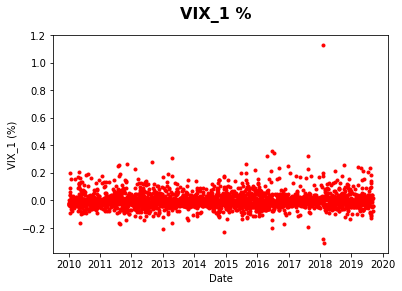

In [19]:
# Plot data 
#Note: only plotting SPX
fig, ax = plt.subplots()

fig.suptitle("VIX_1 %", fontsize=16, fontweight="bold")

ax.set_xlabel("Date")
ax.set_ylabel("VIX_1 (%)")


ax.plot(percent_change_stock_df.index, percent_change_stock_df["VIX_1"], '.r')

plt.show()

In [ ]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = percent_change_stock_df["SPX"].values.reshape(-1, 1)
y = percent_change_stock_df["VIX_1"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

In [ ]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("SPX ($)")
plt.ylabel("VIX 1 ($)")

In [ ]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
# Fit the model to the training data. 

model.fit(X_train, y_train)

In [ ]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
# Set regression line - VIX_1 (%change) vs SPX (%change) (no ML)
(slope, intercept, rvalue, _, _) = linregress(percent_change_stock_df["SPX"], percent_change_stock_df["VIX_1"])
exp_value = slope * percent_change_stock_df["SPX"] + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("VIX_1 (%) vs SPX (%)", fontsize=16, fontweight="bold")

ax.set_xlabel("SPX (%)")
ax.set_ylabel("VIX_1 (%)")

ax.plot(percent_change_stock_df["SPX"], percent_change_stock_df["VIX_1"], linewidth=0, marker='o')
ax.plot(percent_change_stock_df["SPX"], exp_value, '--r')

plt.show()

In [ ]:
#Display key statistics of basic linear regression (no ML)

rsquared = round(rvalue**2, 3)

print('Equation of best-fit line:')
print(f'VIX_1 (%) = {round(intercept,3)} + {round(slope,3)}(SPX (%))')
print('')
print(f'R-value = {round(rvalue,3)}')
print(f'R-sq = {rsquared}')
print(f'{rsquared*100}% of the variation of VIX Futures (1) %Change can be explained by SPX %Change')

In [ ]:
#Show correlation matrix between all stock indexes
percent_change_stock_df.corr()

In [ ]:
#Long Short-Term Memory Networks With Python
